#  Predictions to Generate Text for Irish Lyrics 

* This notebook is considered more dataset than the other version of Irish Lyrics model 

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-12-26 20:44:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-12-26 20:44:34 (126 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()
max_sequence_len = 6
sentences=[]
alltext=[]
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower()
alltext.append(corpus)
words = corpus.split(" ")
range_size = len(words)-max_sequence_len
for i in range(0, range_size):
	thissentence=""
	for word in range(0, max_sequence_len-1):
		word = words[i+word]
		thissentence = thissentence + word
		thissentence = thissentence + " "
	sentences.append(thissentence)

print(sentences)

In [ ]:
oov_tok = "<OOV>"
vocab_size=2700
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, split=" ", char_level=False)
tokenizer.fit_on_texts(alltext)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [ ]:
input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
#max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(xs.shape)
print(xs[:20])

(56643, 5)


## Build and train model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 16, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=20, verbose=1)
# model.save("bidiirish2.h5")

## Model Accuracy

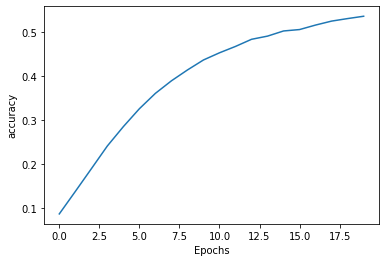

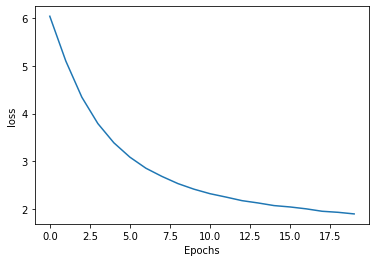

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [ ]:
seed_text = "Come all ye maidens young and"                        # next word would be fair
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

[2]


In [ ]:
# seed_text = "sweet jeremy saw dublin"

# token_list = tokenizer.texts_to_sequences([seed_text])[0]
# token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
# #print(model.predict(token_list))  
# predicted = model.predict_classes(token_list)
# pred_classes=model.predict(token_list)
# print(pred_classes.reshape(-1)[predicted])
# print(predicted)
# for word, index in tokenizer.word_index.items():
# 	if index == predicted:
# 		print(word)
# 		break

In [ ]:
# seed_text = "are you feeling lucky"
# next_words = 100

  
# for _ in range(next_words):
# 	token_list = tokenizer.texts_to_sequences([seed_text])[0]
# 	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
# 	predicted = model.predict_classes(token_list, verbose=0)
# 	output_word = ""
# 	for word, index in tokenizer.word_index.items():
# 		if index == predicted:
# 			output_word = word
# 			break
# 	seed_text += " " + output_word
# print(seed_text)